Recently, I was reading through [A/B Testing with Machine Learning - A Step-by-Step Tutorial](https://www.business-science.io/business/2019/03/11/ab-testing-machine-learning.html) written by [Matt Dancho](https://www.linkedin.com/in/mattdancho/) of [Business Science](https://www.business-science.io). I have been always fascinated by the idea of **A/B Testing** and the amount of impact it can bring in businesses. The tutorial is very definitive and Matt has explained each and every step in the tutorial. He has detailed about each and every decision taken while developing the solution. 

Even though the tutorial is written in `R`, I was able to scram through his code and my knowledge of Data Science helped me to understand the concepts very quickly. I will have to thank Matt for putting together all the key ingredients of the Data Science world and or using them to solve a real problem.  

I decided to replicate the solution in `Python` and I was able to do it. However, there are some minor differences in my implementation but those can be ignored, I think. Apart from cell annotations, I have not detailed any of the steps because, for that, you really should follow the article I mentioned. 

## Data loading

In [1]:
import pandas as pd

control_data = pd.read_csv('data/control_data.csv')
experiment_data = pd.read_csv('data/experiment_data.csv')

In [2]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [3]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


## Number summaries and basic investigations

In [4]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date           37 non-null object
Pageviews      37 non-null int64
Clicks         37 non-null int64
Enrollments    23 non-null float64
Payments       23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [5]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date           37 non-null object
Pageviews      37 non-null int64
Clicks         37 non-null int64
Enrollments    23 non-null float64
Payments       23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [6]:
control_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [7]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [8]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


## Data wrangling

In [2]:
# Combine with Experiment data
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
15,"Sun, Oct 26",8881,693,153.0,101.0
35,"Sat, Nov 15",8630,743,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
27,"Fri, Nov 7",9272,767,NaN,NaN
5,"Thu, Oct 16",9670,823,138.0,82.0
10,"Tue, Oct 21",10660,867,196.0,105.0
25,"Wed, Nov 5",9570,805,NaN,NaN
33,"Thu, Nov 13",9721,829,NaN,NaN


In [3]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Add row id
data_total['row_id'] = data_total.index

# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)

# Remove missing data
data_total.dropna(inplace=True)

# Add a binary column Experiment to denote
# if the data was part of the experiment or not (Random)
data_total['Experiment'] = np.random.randint(2, size=len(data_total))

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date and Payments columns
del data_total['Date'], data_total['Payments']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

In [11]:
# Check the new data
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


In [4]:
# Reorder the columns 
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

In [5]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],\
                                                    data_total['Enrollments'], test_size=0.2)

In [6]:
# Converting strings to numbers
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [17]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9535,759,1
10,10,1,10551,864,5
2,2,0,10480,884,1
3,3,1,9867,827,5
16,16,0,9655,771,1


In [18]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


## Helper functions
- Function for printing the evaluation scores related to a _regression_ problem
- Function for plotting the original values and values predicted by the model

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

## Linear regression: A baseline

In [70]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [187]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [180]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.988871314039848
R2_Squared: 0.050950018270393915
MAE Score: 19.5860618387751


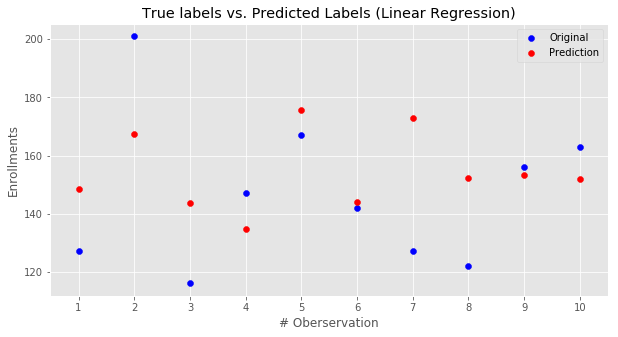

In [188]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [72]:
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:            Enrollments   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     400.1
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           7.92e-27
Time:                        12:58:39   Log-Likelihood:                -163.65
No. Observations:                  36   AIC:                             335.3
Df Residuals:                      32   BIC:                             341.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Experiment    -1.4515      8.373     -0.173      0.8

In [97]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,1.974764e-07
2,Clicks,3.804647e-05
3,DOW,2.299762e-01
0,Experiment,8.634578e-01


## Model 02: Decision Tree

In [189]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


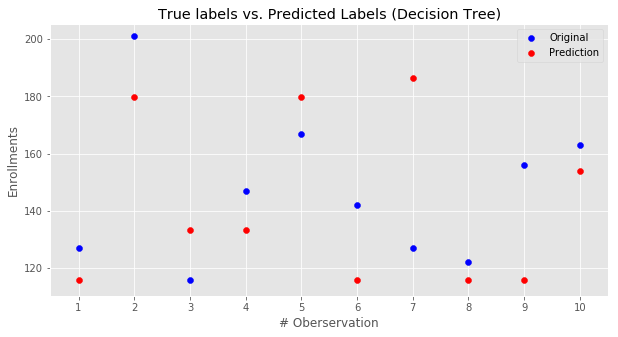

In [190]:
plot_preds(y_test, y_preds, 'Decision Tree')

## Decision tree visualization

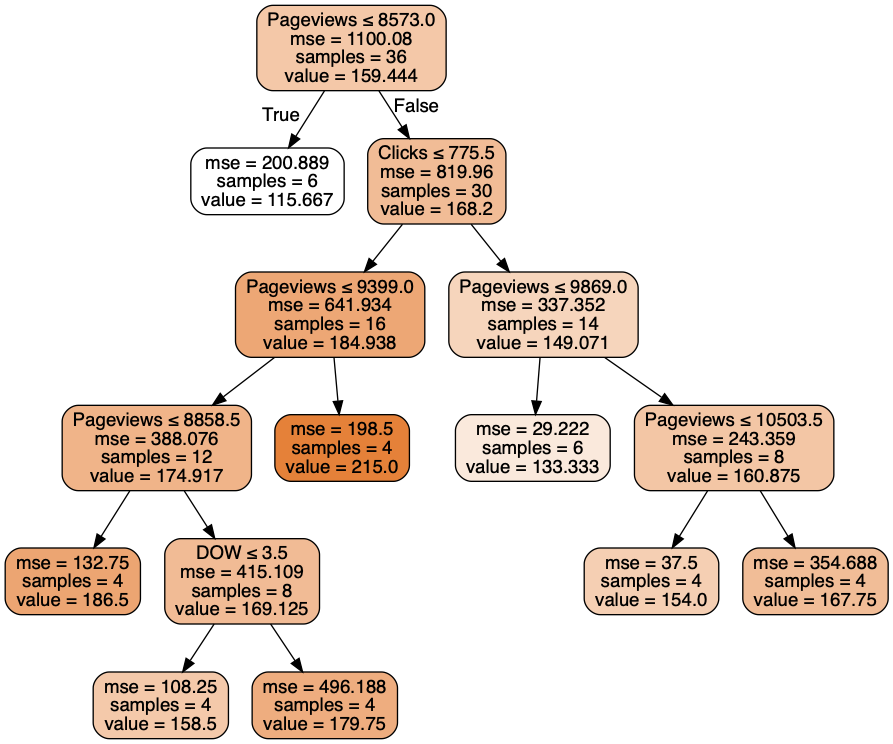

In [191]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Model 03: `XGBoost`

In [133]:
import xgboost as xgb

In [134]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [220]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [236]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [237]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

In [238]:
calculate_metrics(y_test, y_preds)

RMSE Score: 20.394753742379482
R2_Squared: 0.3140280028163105
MAE Score: 17.774598693847658


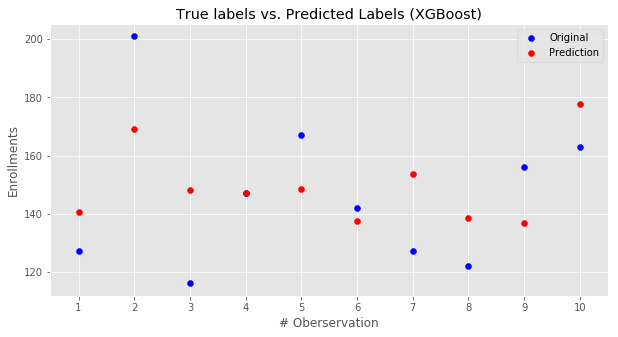

In [239]:
plot_preds(y_test, y_preds, 'XGBoost')

> I used a `gblinear` booster for XGBoost and XGBoost currently does support feature importances linear models.

## Model 04: H2O.ai's AutoML

In [10]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h2o/backend/connection.py:317: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  "This may interfere with your H2O Connection." % name)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_191"; OpenJDK Runtime Environment (build 1.8.0_191-8u191-b12-2ubuntu0.16.04.1-b12); OpenJDK 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /home/nbuser/anaconda3_420/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0nfcfis4
  JVM stdout: /tmp/tmp0nfcfis4/h2o_nbuser_started_from_python.out
  JVM stderr: /tmp/tmp0nfcfis4/h2o_nbuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,07 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_nbuser_filk0a
H2O cluster total nodes:,1
H2O cluster free memory:,910 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


> To use h2o.ai's utilities on the dataset, the library requires the data to be in **H2OFrame** format. 

In [14]:
X_train['Enrollments'] = y_train
X_test['Enrollments'] = y_test

In [16]:
X_train_h2o = h2o.H2OFrame(X_train)
X_test_h2o = h2o.H2OFrame(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:
features = X_train.columns.values.tolist()
target = "Enrollments"

In [41]:
# Construct the AutoML pipeline
auto_h2o = H2OAutoML()
# Train 
auto_h2o.train(x=features,
               y=target,
               training_frame=X_train_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [42]:
# Overview of how the models performed
auto_h2o.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_grid_1_AutoML_20190418_095149_model_19,394.013,19.8498,394.013,16.6412,0.122494
DeepLearning_grid_1_AutoML_20190418_095149_model_17,456.295,21.3611,456.295,17.0919,0.130239
DeepLearning_grid_1_AutoML_20190418_095149_model_28,456.994,21.3774,456.994,17.3409,0.133017
GBM_grid_1_AutoML_20190418_093134_model_6,471.103,21.7049,471.103,17.7187,0.135341
DeepLearning_grid_1_AutoML_20190418_095149_model_21,474.091,21.7736,474.091,17.3858,0.131161
DeepLearning_grid_1_AutoML_20190418_095149_model_25,482.937,21.9758,482.937,17.4681,0.140002
XGBoost_grid_1_AutoML_20190418_093134_model_5,483.69,21.993,483.69,17.729,0.138482
DeepLearning_grid_1_AutoML_20190418_095149_model_8,483.857,21.9967,483.857,18.8936,0.134775
GBM_1_AutoML_20190418_095149,487.348,22.076,487.348,18.7017,0.138016
DeepLearning_grid_1_AutoML_20190418_095149_model_29,487.631,22.0824,487.631,18.8202,0.144757


In [43]:
# Extract the best model from the leaderboard
auto_h2o = auto_h2o.leader

In [44]:
X_test_temp = X_test.copy()
del X_test_temp['Enrollments']

In [45]:
# Employing the model to make inference
X_test_h2o_copy = h2o.H2OFrame(X_test_temp)
y_preds = auto_h2o.predict(X_test_h2o_copy)

# Convert the predictions to a native list
y_preds = h2o.as_list(y_preds["predict"])

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


In [46]:
calculate_metrics(y_test, y_preds)

RMSE Score: 22.073201859707595
R2_Squared: 0.19647364545913504
MAE Score: 20.267868598386883


> **XGBoost Still Wins!**